# Desafio Evaluado S3: 

## Estimando curvas de densidad de probabilidad

### Req 1 

* Importar un csv (2 puntos): Importe el set de datos creados por usted al final de la sesión pasada.

In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid') # Gráficos estilo seaborn
plt.rcParams["figure.figsize"] = (10, 6) # Tamaño gráficos

In [275]:
df = pd.read_csv('subsample_dlt_demo.csv')
df.head()

,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners,region_recod
0,0.747,BIH,1,8507.65040,3.871,5.5,2.355769,NaN,NaN,EastEurope
1,0.724,DMA,10,12613.72000,NaN,NaN,NaN,NaN,86.32093,Caribbean
2,0.421,GNB,4,961.26001,NaN,8.5,NaN,2.17313,NaN,SubSaharian
3,0.775,CRI,2,9485.71000,NaN,3.5,4.666449,6.92724,78.12114,LatAm
4,0.450,GMB,4,1601.88000,NaN,7.7,4.276581,2.76771,NaN,SubSaharian


### Req 2: Importar su conjunto de funciones (2 puntos)

* Generar un archivo ancilliary_funcs.py para guardar las funciones creadas en la sesión pasada e importe.

In [276]:
import ancilliary_func_dlt as af

* Utilizar las funciones creadas para inspeccionar la cantidad de casos perdidos de la muestra importada.

In [277]:
list(df.columns)

['undp_hdi',
 'ccodealp',
 'ht_region',
 'gle_cgdpc',
 'imf_pop',
 'ffp_hf',
 'wef_qes',
 'wdi_expedu',
 'wdi_ners',
 'region_recod']

In [278]:
for columna in list(df.columns):
    print(f"{columna}: {af.valores_perdidos(df, columna, print_list=False)}")

undp_hdi: (6, 6.185567010309279)
ccodealp: (0, 0.0)
ht_region: (0, 0.0)
gle_cgdpc: (1, 1.0309278350515463)
imf_pop: (27, 27.835051546391753)
ffp_hf: (9, 9.278350515463918)
wef_qes: (20, 20.618556701030926)
wdi_expedu: (26, 26.804123711340207)
wdi_ners: (30, 30.927835051546392)
region_recod: (0, 0.0)


### Req 3: Estimar el puntaje Z de una variable (2 puntos)
Se debe utilizar la que posea la menor cantidad de datos perdidos (o que no posea).

* Generar una nueva columna en la tabla de datos que contenga el puntaje Z de dicha variable. Recuerde que para calcular el puntaje z de una observación se utiliza la fórmula:𝑧𝑖= ( 𝑥𝑖 − 𝑥 ) / σ (𝑥)

*Utilizamos la variable continua con menos NA gle_cgdpc: (1, 1.0309278350515463)*
* 'gle_cgdpc'

In [279]:
gle_cgdpc_dropna = df['gle_cgdpc'].dropna()

In [280]:
gle_cgdpc_media = gle_cgdpc_dropna.mean()
gle_cgdpc_var = gle_cgdpc_dropna.var()
print(f'media {gle_cgdpc_media} varianza {gle_cgdpc_var}')

media 14784.963549999999 varianza 366871564.38934606


In [281]:
df['puntaje_z'] = (df['gle_cgdpc'] - gle_cgdpc_media) / gle_cgdpc_var
df.head()

,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners,region_recod,puntaje_z
0,0.747,BIH,1,8507.65040,3.871,5.5,2.355769,NaN,NaN,EastEurope,-0.000017
1,0.724,DMA,10,12613.72000,NaN,NaN,NaN,NaN,86.32093,Caribbean,-0.000006
2,0.421,GNB,4,961.26001,NaN,8.5,NaN,2.17313,NaN,SubSaharian,-0.000038
3,0.775,CRI,2,9485.71000,NaN,3.5,4.666449,6.92724,78.12114,LatAm,-0.000014
4,0.450,GMB,4,1601.88000,NaN,7.7,4.276581,2.76771,NaN,SubSaharian,-0.000036


* Para ordenar los valores pueden utilizar la función sort_values del DataFrame analizado. Lean la documentación asociada al argumento by.

In [282]:
df_ordenada_z = df.sort_values(by='puntaje_z').copy()

* Asegúrense de eliminar las observaciones que tengan valores perdidos con dropna. Lean la documentación asociada al argumento subset.

In [283]:
df_ordenada_z = df_ordenada_z.dropna(subset='puntaje_z')

* Seleccionen las primeras y últimas 10 observaciones de la base reordenada. ¿Qué características en común se encuentran?

In [284]:
df_ordenada_z.head(10)

,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners,region_recod,puntaje_z
12,0.351,NER,4,644.53998,NaN,6.9,NaN,6.70941,15.665040,SubSaharian,-0.000039
76,0.406,BDI,4,663.57001,NaN,6.8,2.595249,5.41642,24.948179,SubSaharian,-0.000038
59,0.441,ETH,4,900.77002,88.347000,7.0,3.599252,4.50051,30.274250,SubSaharian,-0.000038
63,0.473,MWI,4,938.34998,17.604000,8.1,3.185532,4.84254,32.942291,SubSaharian,-0.000038
2,0.421,GNB,4,961.26001,NaN,8.5,NaN,2.17313,NaN,SubSaharian,-0.000038
64,0.498,COM,4,972.35999,0.776000,7.8,NaN,4.86862,43.934471,SubSaharian,-0.000038
9,0.431,SLE,4,979.95001,6.232000,8.4,2.986086,2.66167,NaN,SubSaharian,-0.000038
85,0.418,ERI,4,1007.28000,NaN,7.6,NaN,NaN,28.415560,SubSaharian,-0.000038
39,0.399,BFA,4,1095.96000,16.500000,6.9,2.868712,4.60476,26.492809,SubSaharian,-0.000037
53,0.479,AFG,8,1282.64000,29.825001,8.1,NaN,3.78028,48.750320,SouthAsia,-0.000037


In [285]:
df_ordenada_z.tail(10)

,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners,region_recod,puntaje_z
49,0.919,CAN,5,36577.078,35.495998,2.2,5.245897,5.28122,NaN,WesternDem,0.000059
5,0.893,FIN,5,36958.211,5.427000,2.3,5.859115,7.16810,94.003181,WesternDem,0.000060
89,0.909,SWE,5,39000.910,9.645000,1.5,4.577006,7.67509,96.651558,WesternDem,0.000066
90,0.924,DEU,5,39486.699,80.983002,2.1,5.241914,4.95219,NaN,WesternDem,0.000067
31,0.864,BRN,7,46103.840,0.412000,4.6,4.417221,3.35319,87.032318,SouthEastAsia,0.000085
34,0.938,CHE,5,50454.410,8.140000,2.1,5.986858,5.09608,84.246483,WesternDem,0.000097
72,0.948,NOR,5,57634.770,5.156000,1.6,5.048264,7.37329,95.201927,WesternDem,0.000117
45,0.799,KWT,3,64342.711,3.999000,3.1,3.075769,NaN,83.578850,NorthAfrica,0.000135
23,0.855,QAT,3,104049.440,2.045000,3.1,5.820522,3.60719,72.464622,NorthAfrica,0.000243
51,NaN,MCO,5,108481.130,NaN,NaN,NaN,1.02195,NaN,WesternDem,0.000255


Se puede observar la negatividad de los primeros 10 y la positividad de los ultimos 10

### Req 4: Estimar el puntaje z de las regiones

Utilizando el resultado anterior, visualice su nueva variable estandarizada (es decir, luego de calcular el puntaje Z).

* Para ello realice un dotplot que muestre el valor promedio de su variable por cada región.
* Agregue además una línea que muestre el promedio total de la variable (es decir, antes de agrupar).

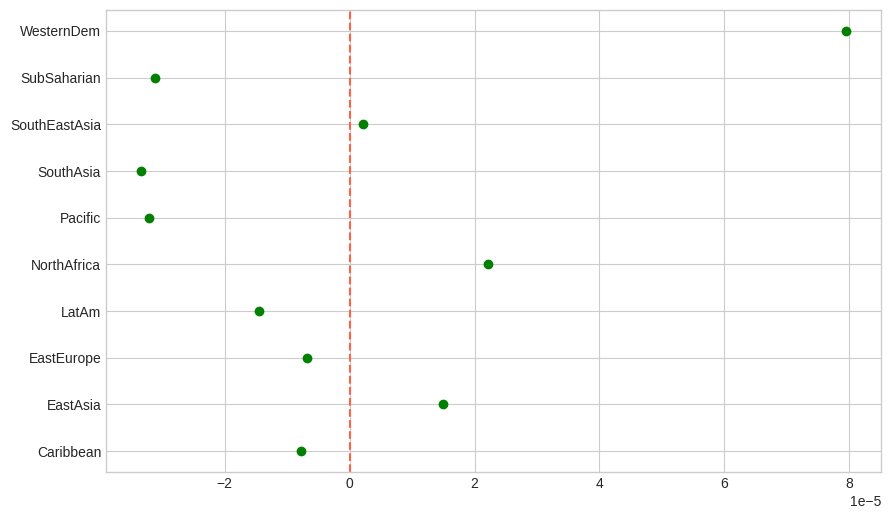

In [286]:
af.grafico_puntos(df_ordenada_z, 'puntaje_z', 'region_recod', 'mean', global_stat=True)

### Req 5 Generar curvas de Densidad de Probabilidad 

* Cree una función que permita visualizar las curvas de Densidad de Probabilidad para las variables imf_pop, gle_cgdpc y wdi_exph.
* La función debe contener como argumentos:
    - df: Tabla de datos 1.
    - variable: Variable a contrastar.

In [287]:
df.columns

Index(['undp_hdi', 'ccodealp', 'ht_region', 'gle_cgdpc', 'imf_pop', 'ffp_hf',
       'wef_qes', 'wdi_expedu', 'wdi_ners', 'region_recod', 'puntaje_z'],
      dtype='object')

In [288]:
df_global = pd.read_csv('qog_std_cs_jan18.csv')
df_global.loc[df_global['ccodealp']=='AZE']['wdi_exph']

6    6.036863
Name: wdi_exph, dtype: float64

In [289]:
df_global_exph = df_global[['ccodealp', 'wdi_exph']]

In [290]:

df_merge_exph = pd.merge(df, df_global_exph,on='ccodealp', how='left')
df_merge_exph

,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners,region_recod,puntaje_z,wdi_exph
0,0.747,BIH,1,8507.65040,3.871,5.5,2.355769,NaN,NaN,EastEurope,-1.711038e-05,9.572016
1,0.724,DMA,10,12613.72000,NaN,NaN,NaN,NaN,86.320930,Caribbean,-5.918266e-06,5.485833
2,0.421,GNB,4,961.26001,NaN,8.5,NaN,2.17313,NaN,SubSaharian,-3.767995e-05,5.593137
3,0.775,CRI,2,9485.71000,NaN,3.5,4.666449,6.92724,78.121140,LatAm,-1.444444e-05,9.313112
4,0.450,GMB,4,1601.88000,NaN,7.7,4.276581,2.76771,NaN,SubSaharian,-3.593378e-05,7.340401
...,...,...,...,...,...,...,...,...,...,...,...,...
92,0.842,SVK,1,21776.34000,5.416,4.2,2.762845,4.23856,NaN,EastEurope,1.905674e-05,8.054048
93,0.775,SRB,1,11343.92000,7.167,5.3,3.058159,4.17861,92.205231,EastEurope,-9.379423e-06,10.368812
94,0.758,AZE,1,9793.30960,9.342,4.3,3.089141,2.63466,NaN,EastEurope,-1.360600e-05,6.036863
95,0.553,SYR,3,4284.41990,NaN,7.4,3.246166,NaN,46.616199,NorthAfrica,-2.862185e-05,3.254531


In [311]:
#['imf_pop', 'gle_cgdpc', 'wdi_expedu']
var = np.random.choice(df['ccodealp'].unique())

In [312]:
#variable a comparar
df.loc[df['ccodealp']==var]['imf_pop']

81    6.266
Name: imf_pop, dtype: float64

In [313]:
import scipy.stats as stats

In [316]:
def curvas_densidad(dataFrame, var):
    contador = 1
    for columna in ['imf_pop', 'gle_cgdpc', 'wdi_exph']:
        
        plt.subplot(3,1,contador)
        plt.hist(dataFrame[columna].dropna(), color='royalblue', alpha=.4, density=True)
        x_min, x_max = plt.xlim()
        x_axis = np.linspace(x_min, x_max, 100)
        gauss_kde = stats.gaussian_kde(dataFrame[columna].dropna()) # Kernel gaussiano
        Z = np.reshape(gauss_kde(x_axis).T, x_axis.shape)
        plt.plot(x_axis, Z, color='cyan', lw=2, alpha=0.5, label=columna)

        punto_compare = dataFrame.loc[dataFrame['ccodealp']==var][columna].values
        plt.axvline(punto_compare, color='fuchsia', linestyle='--', lw=2,alpha=0.5, label=var)
        plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=12, title='Leyenda')
        plt.title(f'Curva de densidad {columna}', fontsize=16)
        plt.subplots_adjust(hspace=0.6)
        contador += 1

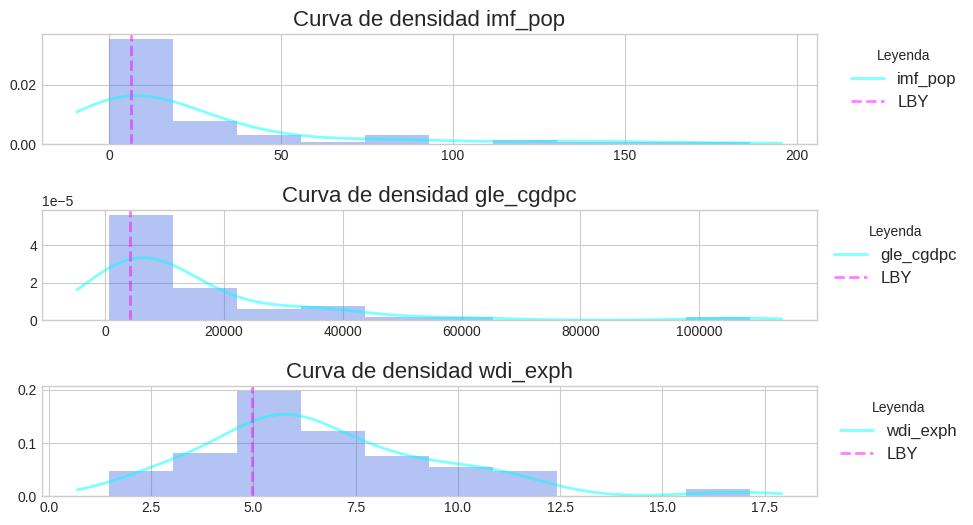

In [317]:
curvas_densidad(df_merge_exph, var)